<a href="https://colab.research.google.com/github/damarismuli/Mchezopesa-Ltd-Game-Results-Prediction-Project/blob/main/Mchezopesa_Ltd_Football_Results_Prediction_Project_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mchezopesa Ltd-Football-Results-Prediction

1. Defining the Question

a) Specifying the Question

To create a model that that will predict the result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly while comparing the rankings of the teams.


b) Defining the Metric for Success

To have a model that has an accuracy of 80%.                                                                           
Have the lowest Root-mean-square deviation(RMSE) score possible.                 
To accurately predict the winning team based on Home team or away team and on whether or not the game is friendly while comparing the rankings of the teams.






c) Understanding the context

The men's FIFA World Ranking is a ranking system for men's national teams in association football.It is currently led by  Brazil.The teams of the men's member nations of FIFA, football's world governing body, are ranked based on their game results with the most successful teams being ranked highest.The rankings were introduced in December 1992.A points system is used, with points being awarded based on the results of all FIFA-recognised full international matches.The ranking is currently sponsored by Coca-Cola; as such, The FIFA/Coca-Cola World Ranking name is also used.

d) Recording the Experimental Design

In this study, we will explore our datasets, perform Exploratory Data Analysis;Univariate, Bivariate and Multivariate Analysis to check on one variable, relationships and differences between different independent variables and the coorelation of the variables respectively. We will then clean/verify data.Perform any necessary feature engineering.Check of multicollinearity.Start building the model using polynomial regression and logistic regression.Cross-validate the model.Compute RMSE.Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test.



e) Data Relevance

We were provided with two datasets that contains men's FIFA World Ranking information which is  relevanceand can help us  to create a model that will predict the result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly while comparing the rankings of the teams.

The two datasets are:


1.results.csv - which contains fifa games from the years 1872 to 2019.It  has the dates,city, the type of tournament and the country in which the games were played.

2.fifa_rankings.csv - which contains FIFA rankings from the year 1992 to 2018.The points,year and country in which the game was played.

2. Reading the Data

In [ ]:
#Importing Our Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [ ]:
# Loading Our Datasets
# ---
ranking = pd.read_csv('fifa_ranking.csv')

# Loading the results Dataset from the source
results = pd.read_csv('results.csv')

3. Checking the Data

In [ ]:
# Determining the no. of records in the ranking dataset
#
ranking.shape


(57793, 16)

In [ ]:
# Determining the no. of records in results dataset
#
results.shape

(40839, 9)

In [ ]:
#Previewing the top 5 rows of ranking dataset
#
ranking.head(5)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [ ]:
#Previewing the top 5 rows of results dataset
results.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
#Previewing the last 5 rows of ranking dataset
ranking.tail(5)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [ ]:
#Previewing the last 5 rows of results dataset
results.tail(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [ ]:
# Checking whether each column has an appropriate datatype in the ranking dataset
#
ranking.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [ ]:
# Checking whether each column has an appropriate datatype in the results dataset
#
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [ ]:
# checking the information about fifa ranking dataset
#
ranking.info

<bound method DataFrame.info of        rank country_full country_abrv  total_points  previous_points  \
0         1      Germany          GER           0.0               57   
1         2        Italy          ITA           0.0               57   
2         3  Switzerland          SUI           0.0               50   
3         4       Sweden          SWE           0.0               55   
4         5    Argentina          ARG           0.0               51   
...     ...          ...          ...           ...              ...   
57788   206     Anguilla          AIA           0.0                0   
57789   206      Bahamas          BAH           0.0                0   
57790   206      Eritrea          ERI           0.0                0   
57791   206      Somalia          SOM           0.0                0   
57792   206        Tonga          TGA           0.0                0   

       rank_change  cur_year_avg  cur_year_avg_weighted  last_year_avg  \
0                0           

In [ ]:
# checking the information about results dataset
#
results.info

<bound method DataFrame.info of              date         home_team        away_team  home_score  away_score  \
0      1872-11-30          Scotland          England           0           0   
1      1873-03-08           England         Scotland           4           2   
2      1874-03-07          Scotland          England           2           1   
3      1875-03-06           England         Scotland           2           2   
4      1876-03-04          Scotland          England           3           0   
...           ...               ...              ...         ...         ...   
40834  2019-07-18    American Samoa           Tahiti           8           1   
40835  2019-07-18              Fiji  Solomon Islands           4           4   
40836  2019-07-19           Senegal          Algeria           0           1   
40837  2019-07-19        Tajikistan      North Korea           0           1   
40838  2019-07-20  Papua New Guinea             Fiji           1           1   

       

In [ ]:
# understanding fifa ranking dataset
#
ranking.describe

<bound method NDFrame.describe of        rank country_full country_abrv  total_points  previous_points  \
0         1      Germany          GER           0.0               57   
1         2        Italy          ITA           0.0               57   
2         3  Switzerland          SUI           0.0               50   
3         4       Sweden          SWE           0.0               55   
4         5    Argentina          ARG           0.0               51   
...     ...          ...          ...           ...              ...   
57788   206     Anguilla          AIA           0.0                0   
57789   206      Bahamas          BAH           0.0                0   
57790   206      Eritrea          ERI           0.0                0   
57791   206      Somalia          SOM           0.0                0   
57792   206        Tonga          TGA           0.0                0   

       rank_change  cur_year_avg  cur_year_avg_weighted  last_year_avg  \
0                0         

In [ ]:
# understanding results dataset
#
results.describe

<bound method NDFrame.describe of              date         home_team        away_team  home_score  away_score  \
0      1872-11-30          Scotland          England           0           0   
1      1873-03-08           England         Scotland           4           2   
2      1874-03-07          Scotland          England           2           1   
3      1875-03-06           England         Scotland           2           2   
4      1876-03-04          Scotland          England           3           0   
...           ...               ...              ...         ...         ...   
40834  2019-07-18    American Samoa           Tahiti           8           1   
40835  2019-07-18              Fiji  Solomon Islands           4           4   
40836  2019-07-19           Senegal          Algeria           0           1   
40837  2019-07-19        Tajikistan      North Korea           0           1   
40838  2019-07-20  Papua New Guinea             Fiji           1           1   

     

4. Cleaning the Datasets

Fifa Ranking Dataset

In [ ]:
#Dropping all data on the dataset before the start of fifa ranking 21/09/2011 since it has 0 ranking points
ranking = ranking[ranking['rank_date'] > '2011-08-24']
ranking.shape

(17208, 16)

In [ ]:
# Checking for Anomalies in the country names
#
ranking['country_full'].unique()

array(['Spain', 'Netherlands', 'Germany', 'Uruguay', 'Portugal', 'Italy',
       'Brazil', 'England', 'Croatia', 'Argentina', 'Greece', 'France',
       'Russia', 'Chile', 'Japan', "Côte d'Ivoire", 'Denmark',
       'Switzerland', 'Australia', 'Mexico', 'Serbia',
       'Bosnia and Herzegovina', 'Norway', 'Paraguay', 'Sweden',
       'Montenegro', 'Turkey', 'Hungary', 'Republic of Ireland',
       'Korea Republic', 'USA', 'Colombia', 'Slovenia', 'Belgium', 'Peru',
       'Egypt', 'Ghana', 'Israel', 'Slovakia', 'Czech Republic',
       'Burkina Faso', 'Senegal', 'Nigeria', 'Armenia', 'Jamaica',
       'Algeria', 'Venezuela', 'Cameroon', 'Romania', 'IR Iran',
       'South Africa', 'Scotland', 'Honduras', 'Panama', 'Bulgaria',
       'Belarus', 'Costa Rica', 'Estonia', 'Morocco', 'Ukraine',
       'Tunisia', 'Libya', 'Mali', 'Georgia', 'Poland', 'Zimbabwe',
       'Gabon', 'Sierra Leone', 'Ecuador', 'Northern Ireland', 'Albania',
       'Finland', 'China PR', 'Latvia', 'Lithuania', 'Guin

In [ ]:
# Identifying the Missing Data on the ranking dataset
#
ranking.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [ ]:
#checking for duplicates in the results column
ranking.duplicated().sum()

37

In [ ]:
# Dealing with duplicate columns in ranking dataset
#

ranking.drop_duplicates
ranking.shape

(17208, 16)

In [ ]:
#Dropping unnecessary columns from fifa dataset

ranking= ranking.drop(columns=['country_abrv', 'total_points','previous_points', 
                                 'rank_change', 'cur_year_avg','last_year_avg', 'last_year_avg_weighted',
                                 'two_year_ago_avg','three_year_ago_avg'])
ranking.head()



,rank,country_full,cur_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,confederation,rank_date
40585,1,Spain,656.13,237.69,207.45,UEFA,2011-09-21
40586,2,Netherlands,727.05,239.62,122.57,UEFA,2011-09-21
40587,3,Germany,557.21,148.20,123.85,UEFA,2011-09-21
40588,4,Uruguay,589.71,111.01,91.07,CONMEBOL,2011-09-21
40589,5,Portugal,638.67,125.09,98.40,UEFA,2011-09-21


In [ ]:
#Adding necessary columns;total weighted points
ranking['total_weighted_points'] =  ranking['cur_year_avg_weighted'] + ranking['two_year_ago_weighted'] + ranking['three_year_ago_weighted']
ranking.head()

,rank,country_full,cur_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,confederation,rank_date,total_weighted_points
40585,1,Spain,656.13,237.69,207.45,UEFA,2011-09-21,1101.27
40586,2,Netherlands,727.05,239.62,122.57,UEFA,2011-09-21,1089.24
40587,3,Germany,557.21,148.20,123.85,UEFA,2011-09-21,829.26
40588,4,Uruguay,589.71,111.01,91.07,CONMEBOL,2011-09-21,791.79
40589,5,Portugal,638.67,125.09,98.40,UEFA,2011-09-21,862.16


In [ ]:
#WChanging the date column datatype from objects to datetime
ranking['rank_date'] = pd.to_datetime(ranking['rank_date'])

In [ ]:
#Dropping unnecessary columns ranking  dataset

ranking= ranking.drop(columns=['cur_year_avg_weighted','two_year_ago_weighted','three_year_ago_weighted'])
ranking.head()

,rank,country_full,confederation,rank_date,total_weighted_points
40585,1,Spain,UEFA,2011-09-21,1101.27
40586,2,Netherlands,UEFA,2011-09-21,1089.24
40587,3,Germany,UEFA,2011-09-21,829.26
40588,4,Uruguay,CONMEBOL,2011-09-21,791.79
40589,5,Portugal,UEFA,2011-09-21,862.16


Results Dataset

In [ ]:
# Identifying the Missing Data on the results dataset
#
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [ ]:
#checking for duplicates in the results column
results.duplicated().sum()

0

In [ ]:
# Dealing with duplicate columns in ranking dataset
#

results.drop_duplicates
results.shape

(40839, 9)

In [ ]:
#Dropping all results on the dataset before the start of fifa ranking 21/09/2011 since it has 0 ranking points
results = results[results['date'] > '2011-08-24']
results.shape

(7558, 9)

In [ ]:
#Renaming the column date to year for uniformity
import datetime

ranking['year'] = ranking['rank_date'].dt.year
ranking.head()

,rank,country_full,confederation,rank_date,total_weighted_points,year
40585,1,Spain,UEFA,2011-09-21,1101.27,2011
40586,2,Netherlands,UEFA,2011-09-21,1089.24,2011
40587,3,Germany,UEFA,2011-09-21,829.26,2011
40588,4,Uruguay,CONMEBOL,2011-09-21,791.79,2011
40589,5,Portugal,UEFA,2011-09-21,862.16,2011


In [ ]:
results['date'] = pd.to_datetime(results['date'])

In [ ]:
results['year'] = results['date'].dt.year
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
33281,2011-08-25,United Arab Emirates,Qatar,3,1,Friendly,al-Ain,United Arab Emirates,False,2011
33282,2011-08-26,Bahrain,Sudan,1,0,Friendly,Riffa,Bahrain,False,2011
33283,2011-08-27,Angola,DR Congo,1,2,Friendly,Dundo,Angola,False,2011
33284,2011-08-27,Fiji,Tahiti,3,0,Pacific Games,Boulari,New Caledonia,True,2011
33285,2011-08-27,Jordan,Indonesia,1,0,Friendly,Amman,Jordan,False,2011


In [ ]:
#Dropping columns for results dataset

results = results.drop(columns=['date','city','neutral'])
results.tail(3)

,home_team,away_team,home_score,away_score,tournament,country,year
40836,Senegal,Algeria,0,1,African Cup of Nations,Egypt,2019
40837,Tajikistan,North Korea,0,1,Intercontinental Cup,India,2019
40838,Papua New Guinea,Fiji,1,1,Pacific Games,Samoa,2019


Merging Our Datasets

In [ ]:
#Merging Our Datasets

combined = results.merge(ranking, left_on=['home_team', 'year'], right_on=['country_full', 'year'], how='inner')
final_combined = combined.merge(ranking, left_on=['away_team', 'year'], right_on=['country_full', 'year'], how='inner')
final_combined.drop(['country', 'year', 'country_full_x', 'country_full_y'], axis=1, inplace=True)
final_combined.head()





,home_team,away_team,home_score,away_score,tournament,rank_x,confederation_x,rank_date_x,total_weighted_points_x,rank_y,confederation_y,rank_date_y,total_weighted_points_y
0,United Arab Emirates,Qatar,3,1,Friendly,112,AFC,2011-09-21,168.98,100,AFC,2011-09-21,291.93
1,United Arab Emirates,Qatar,3,1,Friendly,112,AFC,2011-09-21,168.98,92,AFC,2011-10-19,305.53
2,United Arab Emirates,Qatar,3,1,Friendly,112,AFC,2011-09-21,168.98,95,AFC,2011-11-23,333.73
3,United Arab Emirates,Qatar,3,1,Friendly,112,AFC,2011-09-21,168.98,93,AFC,2011-12-21,314.79
4,United Arab Emirates,Qatar,3,1,Friendly,113,AFC,2011-10-19,169.00,100,AFC,2011-09-21,291.93


In [ ]:
#Renaming our column names 
final_combined.rename(columns={'rank_x':'home_team_rank',
                     'rank_y':'away_team_rank',
                     'total_weighted_points_x':'home_team_weighted_points',
                     'total_weighted_points_y':'away_team_weighted_points'}, 
                 inplace=True)
 
final_combined.head()




,home_team,away_team,home_score,away_score,tournament,home_team_rank,confederation_x,rank_date_x,home_team_weighted_points,away_team_rank,confederation_y,rank_date_y,away_team_weighted_points
0,United Arab Emirates,Qatar,3,1,Friendly,112,AFC,2011-09-21,168.98,100,AFC,2011-09-21,291.93
1,United Arab Emirates,Qatar,3,1,Friendly,112,AFC,2011-09-21,168.98,92,AFC,2011-10-19,305.53
2,United Arab Emirates,Qatar,3,1,Friendly,112,AFC,2011-09-21,168.98,95,AFC,2011-11-23,333.73
3,United Arab Emirates,Qatar,3,1,Friendly,112,AFC,2011-09-21,168.98,93,AFC,2011-12-21,314.79
4,United Arab Emirates,Qatar,3,1,Friendly,113,AFC,2011-10-19,169.00,100,AFC,2011-09-21,291.93


5. Exploratory Data Analysis

a.) Univariate

In [ ]:
#Summary statistics

final_combined.describe(include='all')

,home_team,away_team,home_score,away_score,tournament,home_team_rank,confederation_x,rank_date_x,home_team_weighted_points,away_team_rank,confederation_y,rank_date_y,away_team_weighted_points
count,690264,690264,690264.000000,690264.000000,690264,690264.000000,690264,690264,690264.000000,690264.000000,690264,690264,690264.000000
unique,193,195,NaN,NaN,42,NaN,6,82,NaN,NaN,6,82,NaN
top,Qatar,Sudan,NaN,NaN,Friendly,NaN,UEFA,2012-08-08 00:00:00,NaN,NaN,UEFA,2012-08-08 00:00:00,NaN
freq,8328,7792,NaN,NaN,252824,NaN,228688,9982,NaN,NaN,220952,9982,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-09-21 00:00:00,NaN,NaN,NaN,2011-09-21 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-07 00:00:00,NaN,NaN,NaN,2018-06-07 00:00:00,NaN
mean,NaN,NaN,1.530968,1.049703,NaN,81.012918,NaN,NaN,398.840025,84.754694,NaN,NaN,379.836261
std,NaN,NaN,1.494180,1.224868,NaN,53.825916,NaN,NaN,270.077590,54.184892,NaN,NaN,263.029589
min,NaN,NaN,0.000000,0.000000,NaN,1.000000,NaN,NaN,0.000000,1.000000,NaN,NaN,0.000000
25%,NaN,NaN,0.000000,0.000000,NaN,35.000000,NaN,NaN,194.370000,39.000000,NaN,NaN,180.270000


In [ ]:
#Checking data distribution using barcharts
# Function to plot barchart
def plotbar(column, figsize):
  plt.figure(figsize = figsize)
  final_combined[column].value_counts().plot.bar()
  plt.title('Bar chart representation for {}'.format(column))
  plt.xlabel(column)
  plt.ylabel('Count')
  return plt.show()

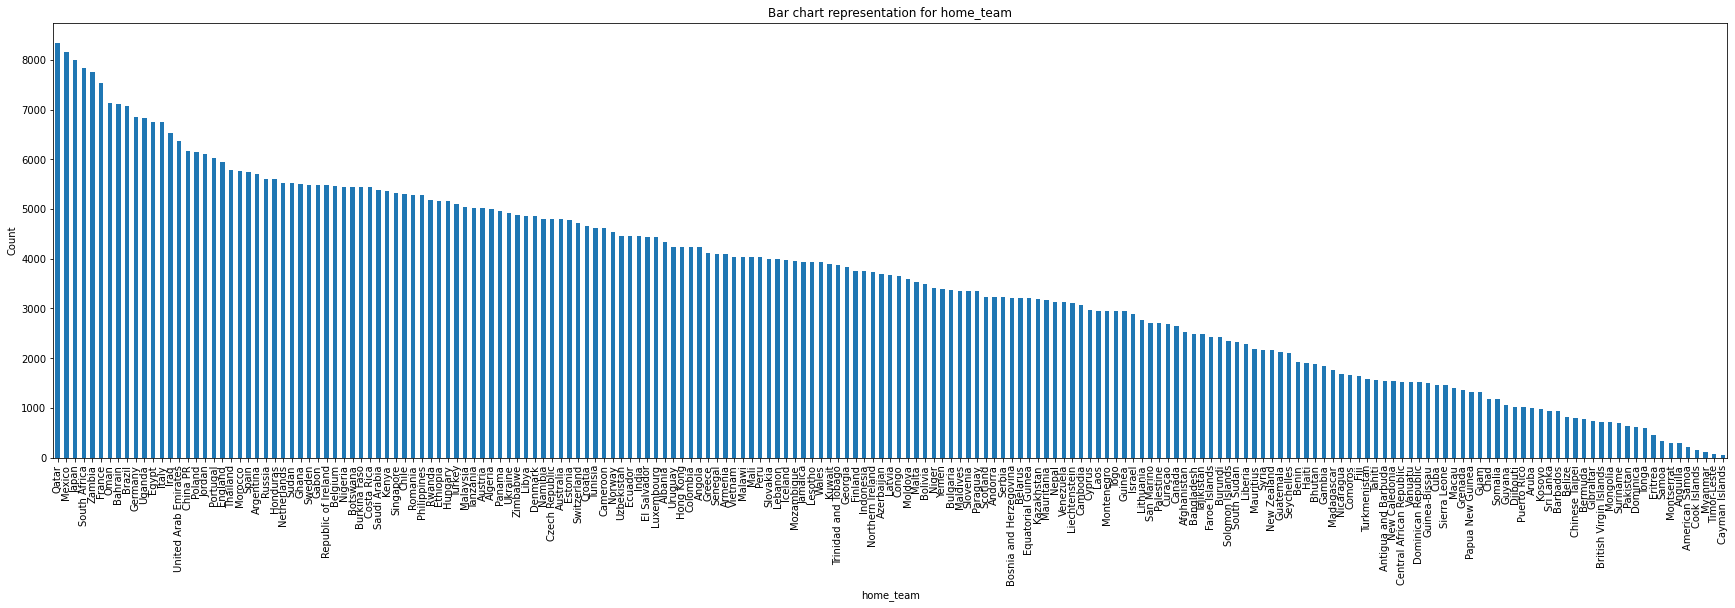

In [ ]:
# home_team representation
plotbar('home_team', (30,8))


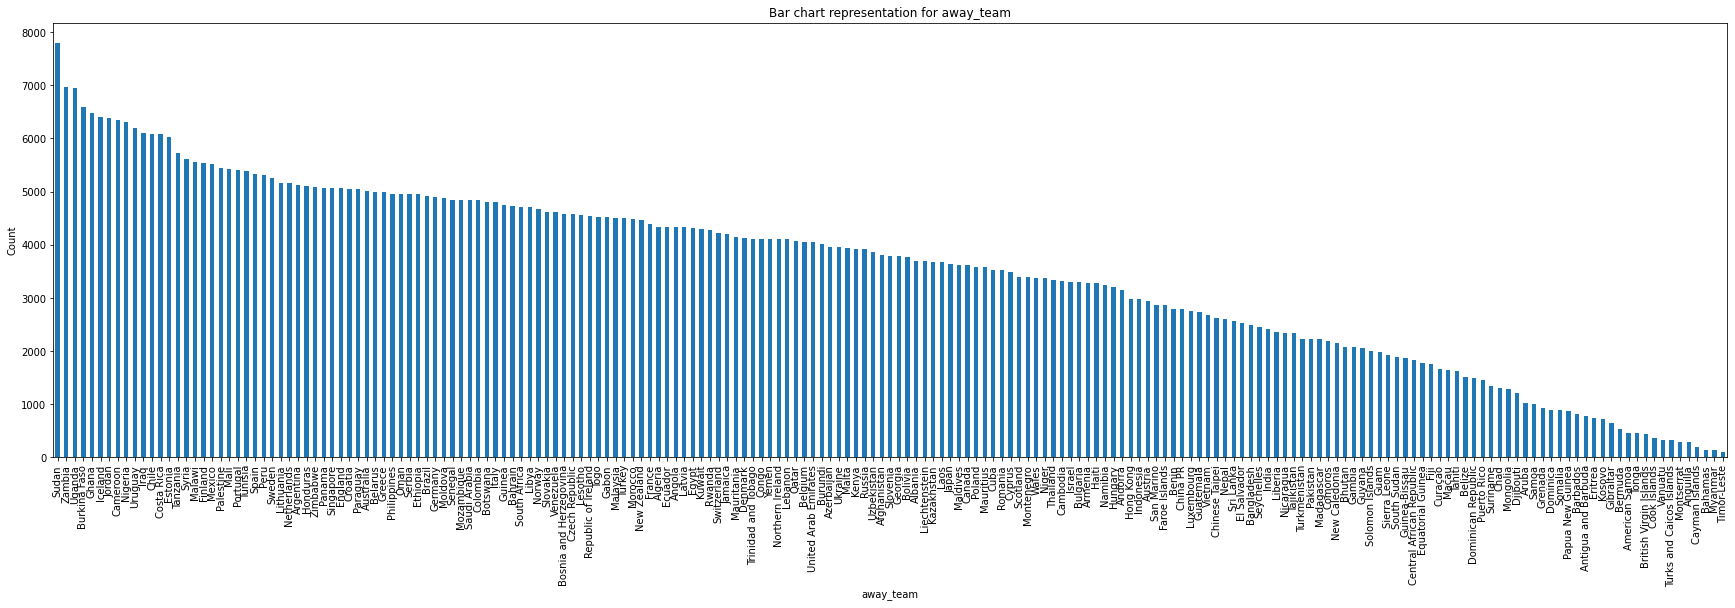

In [ ]:
# home_team representation
plotbar('away_team', (30,8))


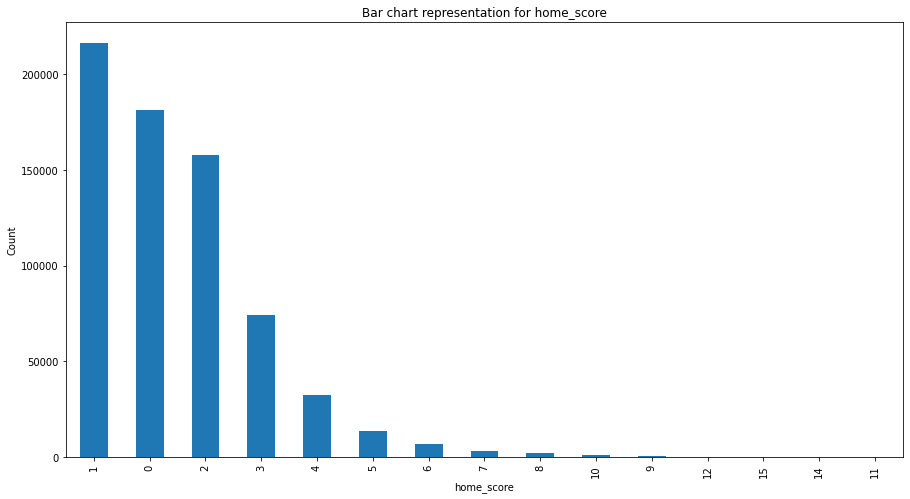

In [ ]:
	# home_team representation
plotbar('home_score', (15,8))


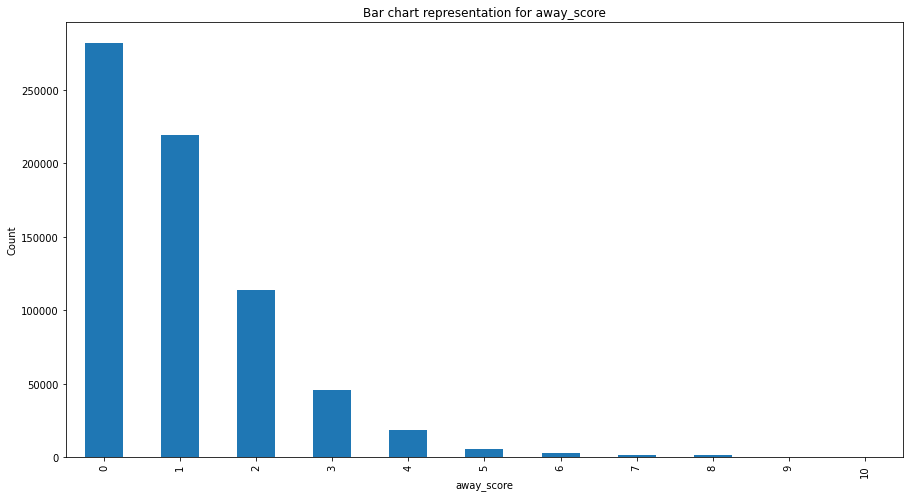

In [ ]:
# home_team representation
plotbar('away_score', (15,8))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b114602d0>,
      dtype=object)

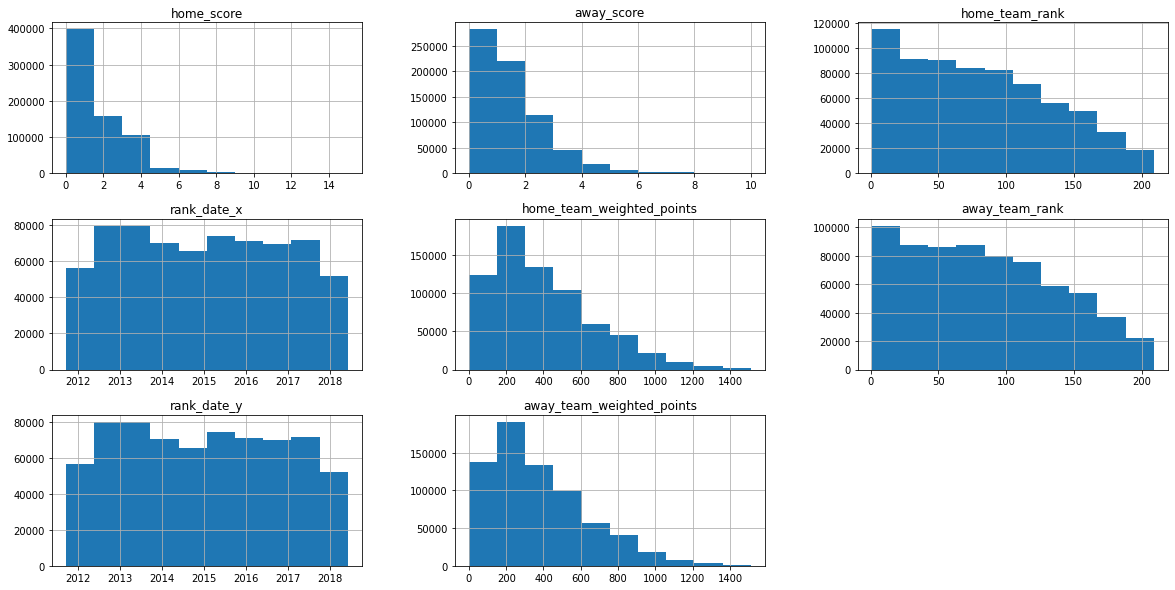

In [ ]:
#Checking for data distribution using histogram for clear visualization
final_combined.hist(bins=10, figsize=[20,10])

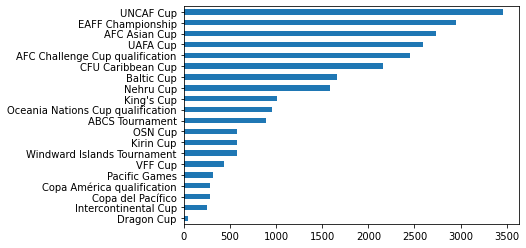

In [ ]:
#Visualizing how tournament recorded matches
final_combined.tournament.value_counts().sort_values().head(20).plot(kind = 'barh')
#The tournament type UNCAF recorded the highest number of matches

b) Bivalent Analysis

i.) Numerical - Numerical

In [ ]:
# correlation between variables
final_combined.corr()

,home_score,away_score,home_team_rank,home_team_weighted_points,away_team_rank,away_team_weighted_points
home_score,1.000000,-0.158281,-0.156901,0.166419,0.274717,-0.231882
away_score,-0.158281,1.000000,0.194509,-0.158606,-0.212452,0.229854
home_team_rank,-0.156901,0.194509,1.000000,-0.906084,0.501955,-0.454748
home_team_weighted_points,0.166419,-0.158606,-0.906084,1.000000,-0.465530,0.448711
away_team_rank,0.274717,-0.212452,0.501955,-0.465530,1.000000,-0.909698
away_team_weighted_points,-0.231882,0.229854,-0.454748,0.448711,-0.909698,1.000000


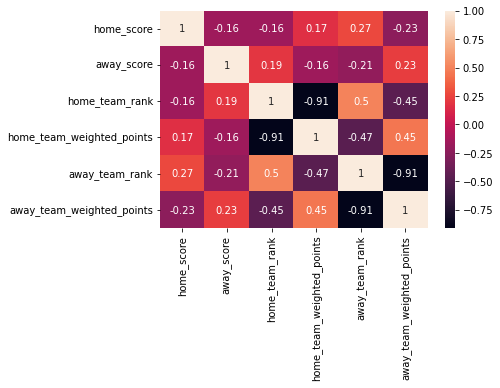

In [ ]:
# Heatmap for correlation
sns.heatmap(final_combined.corr(), annot = True)

In [ ]:
# scatter plot function
def plotscatter(column1, column2):
  plt.scatter(final_combined[column1], final_combined[column2])
  plt.xlabel(column1)
  plt.ylabel(column2)
  plt.title('Scatter plot for {} and {}'.format(column1, column2))
  return plt.show()

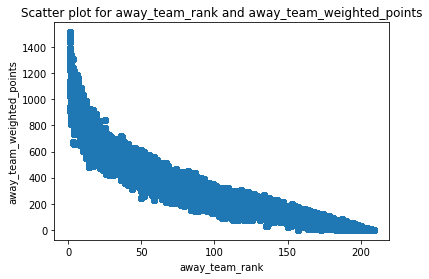

In [ ]:
plotscatter('away_team_rank', 'away_team_weighted_points')


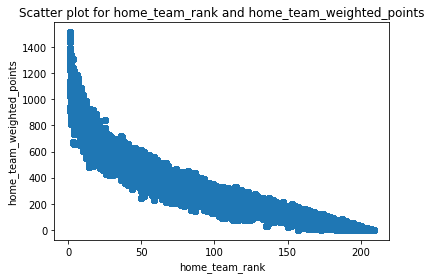

In [ ]:
plotscatter('home_team_rank', 'home_team_weighted_points')

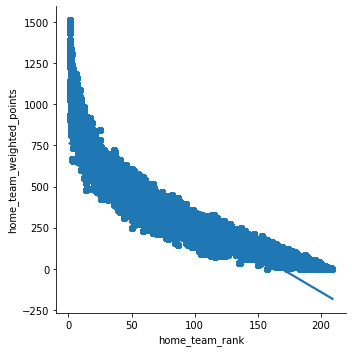

In [ ]:
sns.lmplot(x="home_team_rank", y="home_team_weighted_points", data=final_combined)

6. Feature engineering 

In [ ]:
#creating a column "score" that shows whether the match ended in a win, loss or draw
def f(row):
    if row['home_score'] == row['away_score']:
        val = 'Draw'
    elif row['home_score'] > row['away_score']:
        val = 'Win'
    else:
        val = 'Lose'
    return val

final_combined['score'] = final_combined.apply(f, axis=1)

print(final_combined.info())
final_combined.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690264 entries, 0 to 690263
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   home_team                  690264 non-null  object        
 1   away_team                  690264 non-null  object        
 2   home_score                 690264 non-null  int64         
 3   away_score                 690264 non-null  int64         
 4   tournament                 690264 non-null  category      
 5   home_team_rank             690264 non-null  int64         
 6   confederation_x            690264 non-null  object        
 7   rank_date_x                690264 non-null  datetime64[ns]
 8   home_team_weighted_points  690264 non-null  float64       
 9   away_team_rank             690264 non-null  int64         
 10  confederation_y            690264 non-null  object        
 11  rank_date_y                690264 non-null  datetime

,home_team,away_team,home_score,away_score,tournament,home_team_rank,confederation_x,rank_date_x,home_team_weighted_points,away_team_rank,confederation_y,rank_date_y,away_team_weighted_points,Status,score
0,United Arab Emirates,Qatar,3,1,Friendly,112,AFC,2011-09-21,168.98,100,AFC,2011-09-21,291.93,Win,Win
1,United Arab Emirates,Qatar,3,1,Friendly,112,AFC,2011-09-21,168.98,92,AFC,2011-10-19,305.53,Win,Win
2,United Arab Emirates,Qatar,3,1,Friendly,112,AFC,2011-09-21,168.98,95,AFC,2011-11-23,333.73,Win,Win


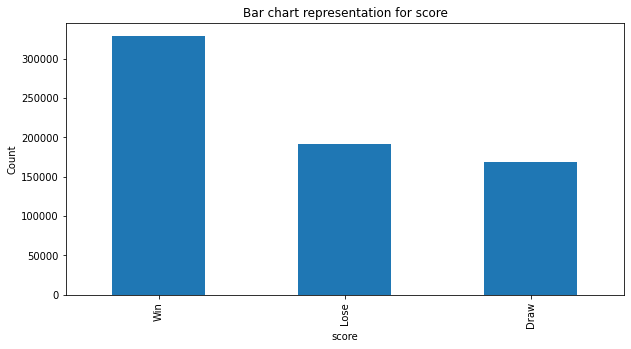

In [ ]:
# visualizing the win draw and lose on a bar plo
plotbar('score', (10,5))
#There's a high probability of the team to win

In [ ]:
#changing categorical columns into binary
#score
#tournament

final_combined['tournament'] = final_combined['tournament'].astype('category')
final_combined['score'] = final_combined['score'].astype('category')


In [ ]:
final_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690264 entries, 0 to 690263
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   home_team                  690264 non-null  object        
 1   away_team                  690264 non-null  object        
 2   home_score                 690264 non-null  int64         
 3   away_score                 690264 non-null  int64         
 4   tournament                 690264 non-null  category      
 5   home_team_rank             690264 non-null  int64         
 6   confederation_x            690264 non-null  object        
 7   rank_date_x                690264 non-null  datetime64[ns]
 8   home_team_weighted_points  690264 non-null  float64       
 9   away_team_rank             690264 non-null  int64         
 10  confederation_y            690264 non-null  object        
 11  rank_date_y                690264 non-null  datetime

In [ ]:
# Import label encoder 
from sklearn import preprocessing

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'score'. 
final_combined['score']= label_encoder.fit_transform(final_combined['score']) 
  
print(final_combined['score'].unique()) 
final_combined.head()
#Where 2:win, 1: lose, 0:Draw

[2 0 1]


,home_team,away_team,home_score,away_score,tournament,home_team_rank,confederation_x,rank_date_x,home_team_weighted_points,away_team_rank,confederation_y,rank_date_y,away_team_weighted_points,Status,score
0,United Arab Emirates,Qatar,3,1,Friendly,112,AFC,2011-09-21,168.98,100,AFC,2011-09-21,291.93,Win,2
1,United Arab Emirates,Qatar,3,1,Friendly,112,AFC,2011-09-21,168.98,92,AFC,2011-10-19,305.53,Win,2
2,United Arab Emirates,Qatar,3,1,Friendly,112,AFC,2011-09-21,168.98,95,AFC,2011-11-23,333.73,Win,2
3,United Arab Emirates,Qatar,3,1,Friendly,112,AFC,2011-09-21,168.98,93,AFC,2011-12-21,314.79,Win,2
4,United Arab Emirates,Qatar,3,1,Friendly,113,AFC,2011-10-19,169.00,100,AFC,2011-09-21,291.93,Win,2


In [ ]:
# Encode labels in column 'touranament'. 
final_combined['tournament']= label_encoder.fit_transform(final_combined['tournament']) 
  
print(final_combined['tournament'].unique()) 
final_combined.head()

[22 21 10  7 32 31  0 36 18 33  6 34  8 40 35 17  3  5 19 28 26 39  9 12
 11 30 24  2  4 13 14 29 23 38 20 41  1 15 27 16 37 25]


,home_team,away_team,home_score,away_score,tournament,home_team_rank,confederation_x,rank_date_x,home_team_weighted_points,away_team_rank,confederation_y,rank_date_y,away_team_weighted_points,Status,score
0,United Arab Emirates,Qatar,3,1,22,112,AFC,2011-09-21,168.98,100,AFC,2011-09-21,291.93,Win,2
1,United Arab Emirates,Qatar,3,1,22,112,AFC,2011-09-21,168.98,92,AFC,2011-10-19,305.53,Win,2
2,United Arab Emirates,Qatar,3,1,22,112,AFC,2011-09-21,168.98,95,AFC,2011-11-23,333.73,Win,2
3,United Arab Emirates,Qatar,3,1,22,112,AFC,2011-09-21,168.98,93,AFC,2011-12-21,314.79,Win,2
4,United Arab Emirates,Qatar,3,1,22,113,AFC,2011-10-19,169.00,100,AFC,2011-09-21,291.93,Win,2


Regression

Approach 1: Polynomial approach

Model 1: Predicting the Home_score

In [ ]:
final_combined.describe

<bound method NDFrame.describe of                    home_team away_team  home_score  away_score  tournament  \
0       United Arab Emirates     Qatar           3           1          22   
1       United Arab Emirates     Qatar           3           1          22   
2       United Arab Emirates     Qatar           3           1          22   
3       United Arab Emirates     Qatar           3           1          22   
4       United Arab Emirates     Qatar           3           1          22   
...                      ...       ...         ...         ...         ...   
690259                  Togo    Gambia           1           1           7   
690260                  Togo    Gambia           1           1           7   
690261                  Togo    Gambia           1           1           7   
690262                  Togo    Gambia           1           1           7   
690263                  Togo    Gambia           1           1           7   

        home_team_rank confed

In [ ]:
# selecting the necessary columns for predicting home score
#
home_score_df = final_combined[['home_team',	'away_team',	'home_score',	'away_score',	'tournament', 'home_team_rank', 'away_team_rank']]



In [ ]:
home_score_df.head()

,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank
0,United Arab Emirates,Qatar,3,1,22,112,100
1,United Arab Emirates,Qatar,3,1,22,112,92
2,United Arab Emirates,Qatar,3,1,22,112,95
3,United Arab Emirates,Qatar,3,1,22,112,93
4,United Arab Emirates,Qatar,3,1,22,113,100


Check of multicollinearity

In [ ]:
# correlation between variables
home_score_df.corr()

,home_score,away_score,tournament,home_team_rank,away_team_rank
home_score,1.000000,-0.158281,-0.020910,-0.156901,0.274717
away_score,-0.158281,1.000000,0.027141,0.194509,-0.212452
tournament,-0.020910,0.027141,1.000000,-0.196711,-0.197538
home_team_rank,-0.156901,0.194509,-0.196711,1.000000,0.501955
away_team_rank,0.274717,-0.212452,-0.197538,0.501955,1.000000


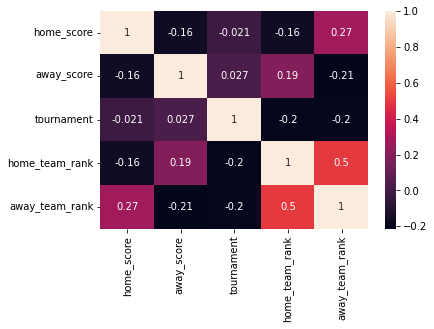

In [ ]:
# Heatmap for correlation
sns.heatmap(home_score_df.corr(), annot = True)
#There's no multicollinearity since none of varialble  Variance Inflation Factor score for the variables is higher 0.5

Modelling

In [ ]:
#importing necessary libraries
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#
X = home_score_df.iloc[:, [0,1,2,3,4,6]]
y = home_score_df.home_score

# Encoding categorical variables
#
X = pd.get_dummies(X, drop_first=True)

# Splitting the dataset into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

# Standardising the X_train and the X_test to the same scale
#
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting the polynomial features to the X_train and X_test
#
poly_features = PolynomialFeatures(degree = 1)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

# Training the model
#
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Making predictions
#
y_pred = regressor.predict(X_test)

# Measuring the accuracy of the model
#
print(np.sqrt(mean_squared_error(y_test, y_pred)))

3.9694513380490945e-15


Hyperparameter tuning

In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
import scipy as sp
from sklearn.model_selection import KFold
# Tuning the parameters of the linear regression model to find the optimal 
# Printing the Linear Regression model parameters that can be tuned
#
from sklearn.linear_model import LinearRegression
LinearRegression()
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


# The parameters that can be tuned are fitting the intercept and normalizing
# Creating a parameters dictionary
#
para_dic = {'normalize': [True, False],
         'fit_intercept': [True, False]}

# Creating a cross validation of 5 folds
#
kfold = KFold(n_splits = 5)

# Using grid search to find the optimal parameters
#
grid_search = GridSearchCV(estimator=regressor, param_grid = para_dic, cv = kfold, scoring = 'neg_mean_squared_error')

# Fitting the grid search 
#
grid_search_results = grid_search.fit(X, y)

# Displaying the best parameters and the the best score
#
print(f'Best score is {grid_search.best_score_} and the best parameters are {grid_search.best_params_}')


Best score is -6.071428744061834e-13 and the best parameters are {'fit_intercept': False, 'normalize': True}


Cross validation to check for overfitting and underfitting

In [ ]:
# Performing cross validation of 5 folds
#
scores = cross_val_score(regressor, X, y, scoring = 'neg_mean_squared_error', cv = 5)

# Calculating the mean of the cross validation scores
#
print(f'Mean of cross validation scores is {np.round(scores.mean()*-1, 3)}')

# Calculating the variance of the cross validation scores from the mean
#
print(f'Standard deviation of the cross validation scores is {np.round(scores.std(), 3)}')
#With standard deviation of 0.0 ,It means that our model is 100% accurate

Mean of cross validation scores is 0.0
Standard deviation of the cross validation scores is 0.0


Creating Residual plot

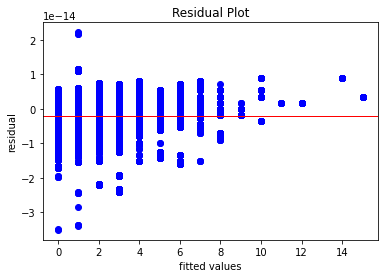

In [ ]:
# Plotting the residual plot
# Residuals have been calculated by substracting the test value from the predicted value
# 
residuals = np.subtract(y_pred, y_test)

# Plotting the residual scatterplot
#
plt.scatter(y_pred, residuals, color='blue')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

 Assessing Residual Plot heteroscedasticity using Bartlett’s test

In [ ]:
# Performing the barlett's test
#
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# Calculating the critical value of the chi squared distribution, to compare it with the test_result
#
degrees_of_freedom = len(y_pred) - 1
probability =  1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degrees_of_freedom)

# The null hypothesis i rejected if  test_result is greater than the critical value
# Concusion:There are patterns to the variance of the data

#  if no patterns are identified, null hypothesis is accepted. 
# Conclusion:the variance is homogeneous across the dataset

if (test_result > critical_value):
  print(f'The test result of {np.round(test_result,2)} is greater than the critical value of {np.round(critical_value, 2)}')
  print('Therefore the variances are unequal, which means that the model should be reassessed')
  print('The variances are heterogenous')
else:
  print(f'The test result of {np.round(test_result,2)} is less than the critical value of {np.round(critical_value, 2)}')
  print('Therefore the variances are equal, which means that the model is okay. No need to reasses')
  print('The variances are homogeneous')

The test result of 11405084.92 is less than the critical value of inf
Thefore the variances are equal, which means that the model is okey. No need to reasses
The variances are homogeneous


Approach 2: Logistic approach

In [ ]:
#Previewing our merged dataset
final_combined.describe

<bound method NDFrame.describe of                    home_team away_team  home_score  away_score  tournament  \
0       United Arab Emirates     Qatar           3           1          22   
1       United Arab Emirates     Qatar           3           1          22   
2       United Arab Emirates     Qatar           3           1          22   
3       United Arab Emirates     Qatar           3           1          22   
4       United Arab Emirates     Qatar           3           1          22   
...                      ...       ...         ...         ...         ...   
690259                  Togo    Gambia           1           1           7   
690260                  Togo    Gambia           1           1           7   
690261                  Togo    Gambia           1           1           7   
690262                  Togo    Gambia           1           1           7   
690263                  Togo    Gambia           1           1           7   

        home_team_rank confed

In [ ]:
# selecting the necessary columns for predicting awayscore
#
away_score_df = final_combined[['home_team',	'away_team',	'home_score',	'away_score',	'tournament', 'home_team_rank', 'away_team_rank', 'Status']]



In [ ]:
#Previewing our away score dataset
away_score_df.head()


,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,Status
0,United Arab Emirates,Qatar,3,1,22,112,100,Win
1,United Arab Emirates,Qatar,3,1,22,112,92,Win
2,United Arab Emirates,Qatar,3,1,22,112,95,Win
3,United Arab Emirates,Qatar,3,1,22,112,93,Win
4,United Arab Emirates,Qatar,3,1,22,113,100,Win



Check of multicollinearity

In [ ]:
# correlation between variables
away_score_df.corr()

,home_score,away_score,tournament,home_team_rank,away_team_rank
home_score,1.000000,-0.158281,-0.020910,-0.156901,0.274717
away_score,-0.158281,1.000000,0.027141,0.194509,-0.212452
tournament,-0.020910,0.027141,1.000000,-0.196711,-0.197538
home_team_rank,-0.156901,0.194509,-0.196711,1.000000,0.501955
away_team_rank,0.274717,-0.212452,-0.197538,0.501955,1.000000


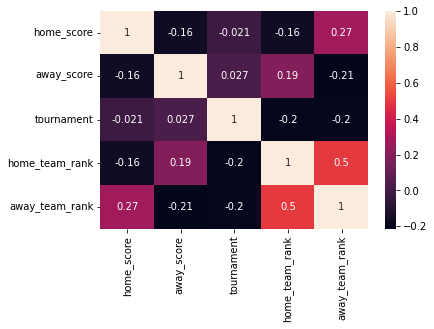

In [ ]:
# Heatmap for correlation
sns.heatmap(away_score_df.corr(), annot = True)
#There's no multicollinearity since none of varialble  Variance Inflation Factor score for the variables is higher 0.5

Modelling

In [ ]:
# Splitting the data into features and the target variable
#

from sklearn.linear_model import LogisticRegression
X = away_score_df.drop('Status', axis = 1)
y = away_score_df.Status

# Encoding the categorical features
#
X = pd.get_dummies(X, drop_first=True)

# Spliting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# Instantiating the model and training the model
#
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

# Making predictions
#
y_prediction = logistic.predict(X_test)

In [ ]:
# Measuring the accuracy of the model
#
print(f'The accuracy of the model is {accuracy_score(y_test, y_prediction)}')

The accuracy of the model is 1.0


In [ ]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_prediction)
confusion_matrix

array([[42574,     0,     0],
       [    0, 47845,     0],
       [    0,     0, 82147]])

Hyperparameter tuning

In [ ]:
# Displaying parameters of the logistic regression model that can be tuned
#
LogisticRegression()

LogisticRegression()

In [ ]:
# Creating a dictionary of parameters to be tuned
#
params = {'C': [1.0, 5.0],
         'penalty': ['l1', 'l2']}

logistic = LogisticRegression()

# Creating a cross validation of 10 folds
#
kfold = KFold(n_splits = 10)

# Using grid search to find the optimal parameters
#
grid_search = GridSearchCV(estimator=logistic, param_grid = params, cv = kfold, scoring = 'accuracy')

# Fitting the grid search 
#
grid_search_results = grid_search.fit(X, y)

# Displaying the best parameters and the the best score
#
print(f'Best score is {grid_search.best_score_} and the best parameters are {grid_search.best_params_}')

Best score is 1.0 and the best parameters are {'C': 1.0, 'penalty': 'l2'}


In [ ]:
away_score_df.head()

,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,Status
0,United Arab Emirates,Qatar,3,1,22,112,100,Win
1,United Arab Emirates,Qatar,3,1,22,112,92,Win
2,United Arab Emirates,Qatar,3,1,22,112,95,Win
3,United Arab Emirates,Qatar,3,1,22,112,93,Win
4,United Arab Emirates,Qatar,3,1,22,113,100,Win


Follow up questions

a). Did we have the right data?Yes


b). Was the provided data enough to answer our question?Yes



Conclusion

The models yield better results